In [7]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
path = "C:\\Users\\asr96\\Downloads\\Compressed\\heart_2020_cleaned.csv_2\\heart_2020_cleaned.csv"
data = pd.read_csv(path)

In [9]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [10]:
for col in data.columns:
    print(data[col].value_counts())
    print('-'*50)

No     292422
Yes     27373
Name: HeartDisease, dtype: int64
--------------------------------------------------
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64
--------------------------------------------------
No     187887
Yes    131908
Name: Smoking, dtype: int64
--------------------------------------------------
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
--------------------------------------------------
No     307726
Yes     12069
Name: Stroke, dtype: int64
--------------------------------------------------
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16

In [11]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [12]:
data['Diabetic'].value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [13]:
data['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [14]:
data['Diabetic'] = data['Diabetic'].replace(['No, borderline diabetes','Yes (during pregnancy)'],['No','Yes'])

In [15]:
data['Diabetic'].value_counts()

No     276434
Yes     43361
Name: Diabetic, dtype: int64

In [16]:
data['Race'].value_counts(normalize=True)*100

White                             76.677872
Hispanic                           8.582373
Black                              7.173033
Other                              3.417189
Asian                              2.522866
American Indian/Alaskan Native     1.626667
Name: Race, dtype: float64

In [17]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [18]:
temp_ser = data['Race'].replace(['Hispanic','Asian','American Indian/Alaskan Native'],'Other')

In [19]:
temp_ser.value_counts(normalize=True)*100

White    76.677872
Other    16.149096
Black     7.173033
Name: Race, dtype: float64

In [20]:
data['Race'] = temp_ser

In [21]:
data['GenHealth'].value_counts(normalize=True)*100

Very good    35.603433
Good         29.121468
Excellent    20.901515
Fair         10.843509
Poor          3.530074
Name: GenHealth, dtype: float64

In [22]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [23]:
binary_cols = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking'
               ,'Diabetic', 'PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer']

In [24]:
for i in binary_cols:
    print(f'{data[i].nunique()}',end=" ")

2 2 2 2 2 2 2 2 2 2 

In [25]:
for col in binary_cols:
    data[col] = data[col].replace(['Yes','No'],[1,0])

In [26]:
data.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                  object
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [27]:
data.select_dtypes('O')

,Sex,AgeCategory,Race,GenHealth
0,Female,55-59,White,Very good
1,Female,80 or older,White,Very good
2,Male,65-69,White,Fair
3,Female,75-79,White,Good
4,Female,40-44,White,Very good
...,...,...,...,...
319790,Male,60-64,Other,Fair
319791,Male,35-39,Other,Very good
319792,Female,45-49,Other,Good
319793,Female,25-29,Other,Good


In [28]:
from sklearn import preprocessing

In [29]:
sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(data['Sex'])

LabelEncoder()

In [30]:
sex_encoder.transform(data['Sex'])

array([0, 0, 1, ..., 0, 0, 0])

In [31]:
sex_encoder.classes_

array(['Female', 'Male'], dtype=object)

In [32]:
data['Sex'] = sex_encoder.transform(data['Sex'])

In [33]:
data['Sex'].value_counts(normalize=True)*100

0    52.472678
1    47.527322
Name: Sex, dtype: float64

In [34]:
data['AgeCategory'].value_counts(normalize=True)*100

65-69          10.679029
60-64          10.533623
70-74           9.714036
55-59           9.305024
50-54           7.936960
80 or older     7.552651
45-49           6.814053
75-79           6.717428
18-24           6.586720
40-44           6.568583
35-39           6.425992
30-34           5.864069
25-29           5.301834
Name: AgeCategory, dtype: float64

In [35]:
len(data['AgeCategory'].value_counts().index)

13

In [36]:
Age_category_encoder = preprocessing.LabelEncoder()
Age_category_encoder.fit(data['AgeCategory'])
temp_Age_col = Age_category_encoder.transform(data['AgeCategory'])

In [37]:
pd.Series(temp_Age_col).value_counts(normalize=True)*100

9     10.679029
8     10.533623
10     9.714036
7      9.305024
6      7.936960
12     7.552651
5      6.814053
11     6.717428
0      6.586720
4      6.568583
3      6.425992
2      5.864069
1      5.301834
dtype: float64

In [38]:
data['AgeCategory'] = temp_Age_col

In [39]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## Duplicates

In [40]:
data.duplicated().sum()

19024

In [41]:
data.duplicated().sum()/len(data)*100

5.94881095701934

In [42]:
data.drop_duplicates(inplace=True)

In [43]:
data.duplicated().sum()

0

In [44]:
df_1=data.copy()

In [45]:
df_1 = pd.get_dummies(df_1)

In [46]:
df_1.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_Black', 'Race_Other', 'Race_White',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [47]:
df_1.duplicated().sum()

0

In [48]:
df_1 = df_1.drop('Race_Other',axis=1)

In [49]:
df_1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Race_Black,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,7,...,1,0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,1,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,0,0,1,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,...,1,0,0,0,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,...,1,0,0,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,...,0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [50]:
for col in df_1.select_dtypes('uint8'):
    df_1[col] = df_1[col].astype(np.int64)

In [51]:
df_1.dtypes

HeartDisease             int64
BMI                    float64
Smoking                  int64
AlcoholDrinking          int64
Stroke                   int64
PhysicalHealth         float64
MentalHealth           float64
DiffWalking              int64
Sex                      int32
AgeCategory              int32
Diabetic                 int64
PhysicalActivity         int64
SleepTime              float64
Asthma                   int64
KidneyDisease            int64
SkinCancer               int64
Race_Black               int64
Race_White               int64
GenHealth_Excellent      int64
GenHealth_Fair           int64
GenHealth_Good           int64
GenHealth_Poor           int64
GenHealth_Very good      int64
dtype: object

<AxesSubplot:>

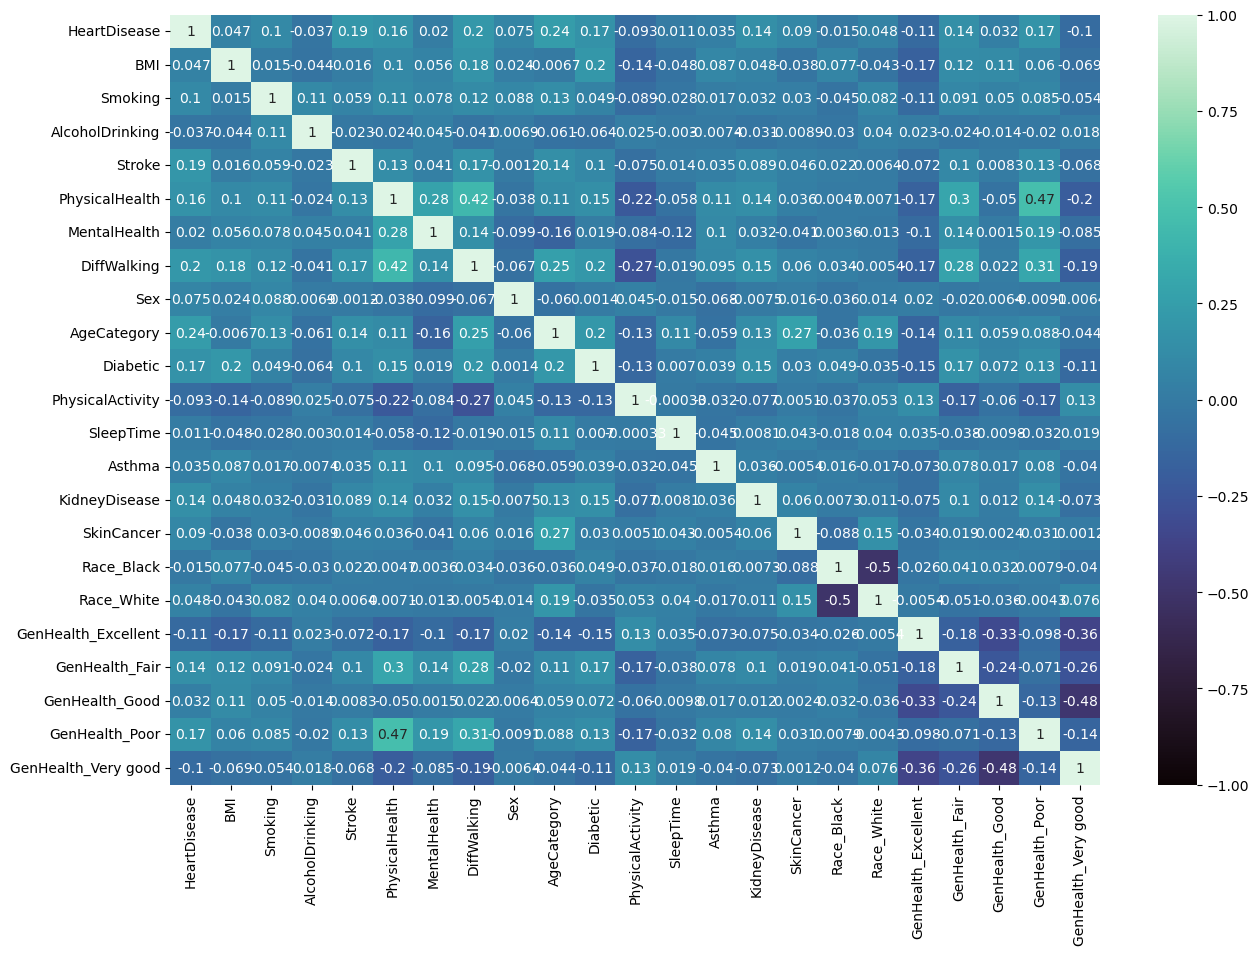

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df_1.corr(),cmap='mako',annot=True,vmax=1,vmin=-1)

<AxesSubplot:>

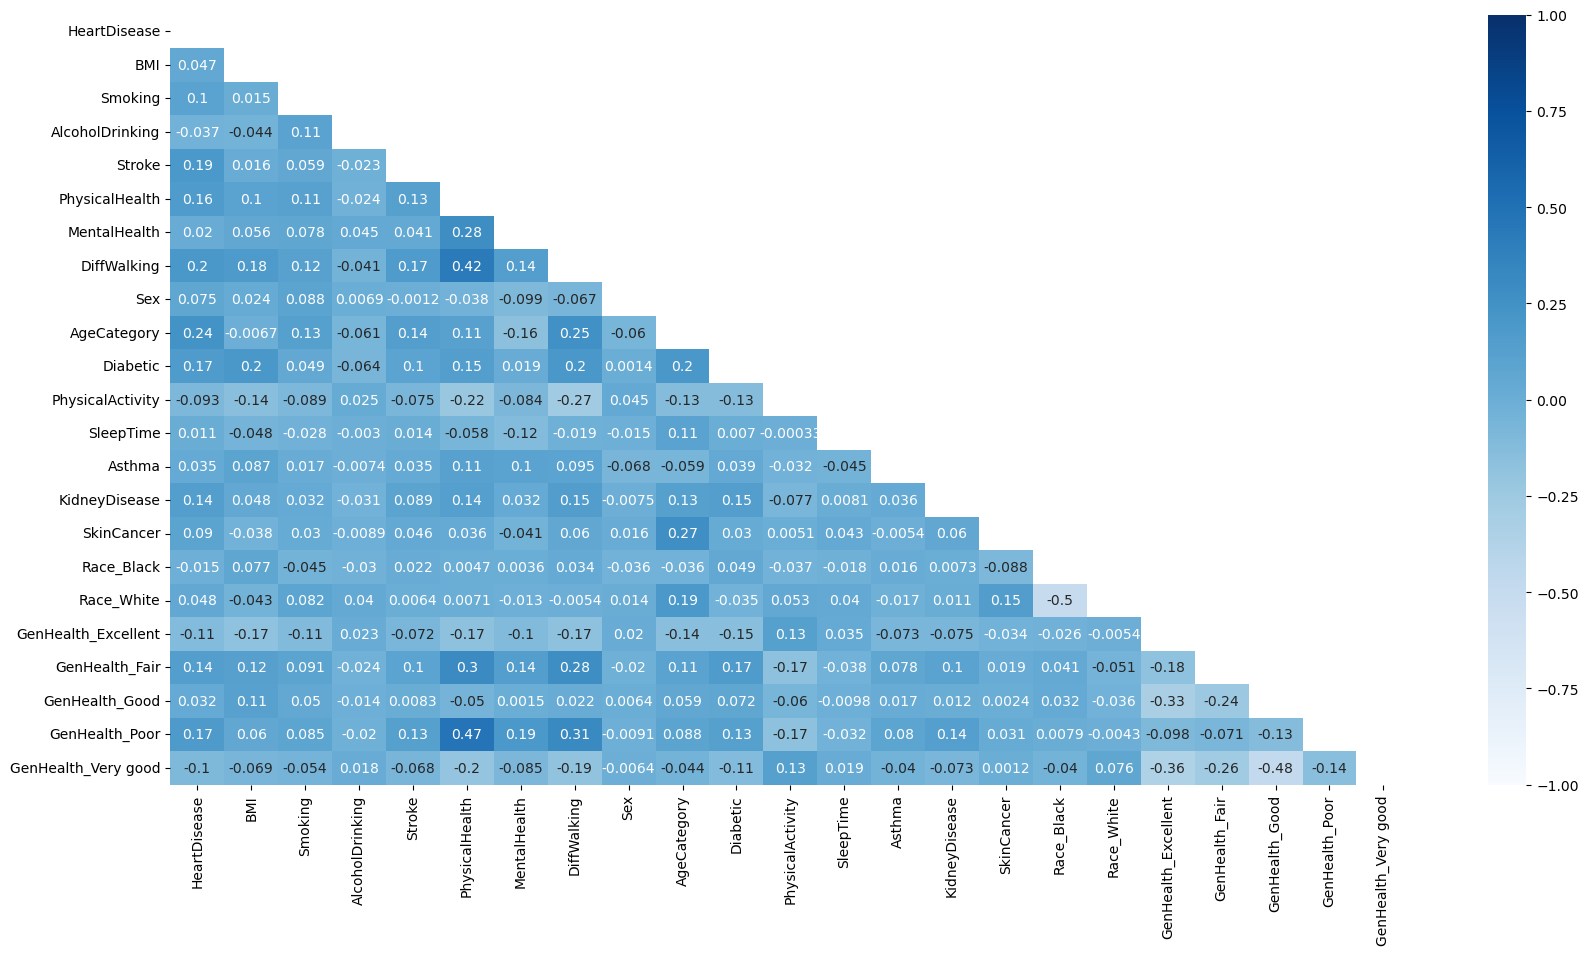

In [53]:
plt.figure(figsize= (20, 10))
corr_matrix = df_1.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,mask=mask,annot=True,vmax=1,vmin=-1,cmap='Blues')

In [54]:
Input_1 = df_1.drop('HeartDisease',axis=1)
target_1 = df_1['HeartDisease']

In [55]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
correlated_with_target = []
uncorrelated_with_target = []
for col in Input_1.columns:
    if Input_1[col].dtype != 'O':
        corr, _ = pearsonr(Input_1[str(col)].values, target_1)
        print(f'{col}  ------>        {corr:.2f}')
        if corr > 0.04:
          # print(f'{col} corr with target ------>{corr:.2f}')
            correlated_with_target.append(col)
        elif corr <= -0.04:
            uncorrelated_with_target.append(col)  

BMI  ------>        0.05
Smoking  ------>        0.10
AlcoholDrinking  ------>        -0.04
Stroke  ------>        0.19
PhysicalHealth  ------>        0.16
MentalHealth  ------>        0.02
DiffWalking  ------>        0.20
Sex  ------>        0.07
AgeCategory  ------>        0.24
Diabetic  ------>        0.17
PhysicalActivity  ------>        -0.09
SleepTime  ------>        0.01
Asthma  ------>        0.04
KidneyDisease  ------>        0.14
SkinCancer  ------>        0.09
Race_Black  ------>        -0.01
Race_White  ------>        0.05
GenHealth_Excellent  ------>        -0.11
GenHealth_Fair  ------>        0.14
GenHealth_Good  ------>        0.03
GenHealth_Poor  ------>        0.17
GenHealth_Very good  ------>        -0.10


In [56]:
correlated_with_target

['BMI',
 'Smoking',
 'Stroke',
 'PhysicalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Diabetic',
 'KidneyDisease',
 'SkinCancer',
 'Race_White',
 'GenHealth_Fair',
 'GenHealth_Poor']

In [57]:
uncorrelated_with_target

['PhysicalActivity', 'GenHealth_Excellent', 'GenHealth_Very good']

In [58]:
len(df_1.columns)

23

In [59]:
# fig,ax = plt.subplots(22,2,figsize=(12,6))
# plt.figure(figsize = (12,6))
# for i in range(10):
#     sns.boxplot(data=df_1,y=df_1[i],color='#cc6699',ax=ax[i,0])
#     sns.scatterplot(data=df_1,x='HeartDisease',y='BMI',color='#cc6699',ax=ax[i,1])
    
# fig.show()

In [60]:
df_1.select_dtypes('float')

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [61]:
df_1.select_dtypes('float').columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

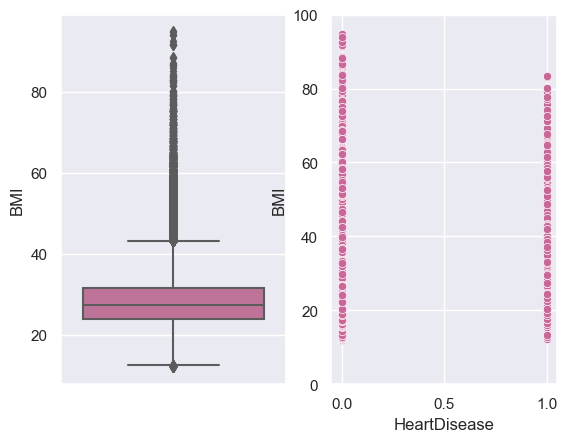

In [62]:
sns.set()
plt.subplot(1, 2, 1)
sns.boxplot(data=df_1,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
ax =sns.scatterplot(data=df_1,x='HeartDisease',y='BMI',color='#cc6699')
ax.set_yticks([0,20,40,60,80,100])
plt.show()

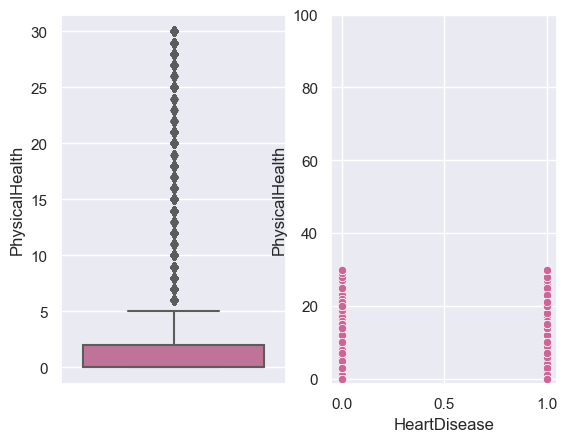

In [63]:
sns.set()
plt.subplot(1, 2, 1)
sns.boxplot(data=df_1,y='PhysicalHealth',color='#cc6699')
plt.subplot(1, 2, 2)
ax =sns.scatterplot(data=df_1,x='HeartDisease',y='PhysicalHealth',color='#cc6699')
ax.set_yticks([0,20,40,60,80,100])
plt.show()

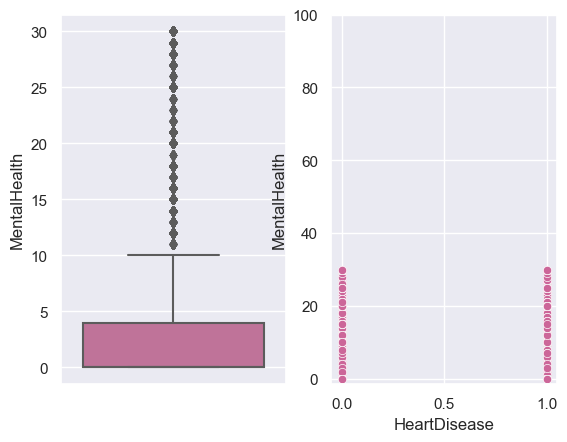

In [64]:
sns.set()
plt.subplot(1, 2, 1)
sns.boxplot(data=df_1,y='MentalHealth',color='#cc6699')
plt.subplot(1, 2, 2)
ax =sns.scatterplot(data=df_1,x='HeartDisease',y='MentalHealth',color='#cc6699')
ax.set_yticks([0,20,40,60,80,100])
plt.show()

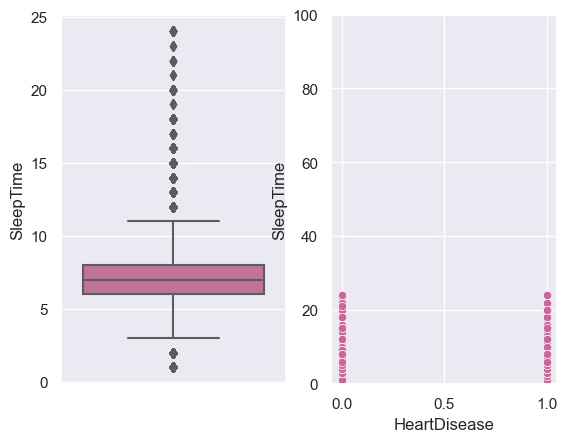

In [65]:
sns.set()
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=df_1,y='SleepTime',color='#cc6699')
# ax1.set_yticks([2,4,6,8,10,20,40,60,80,100])
plt.subplot(1, 2, 2)
ax =sns.scatterplot(data=df_1,x='HeartDisease',y='SleepTime',color='#cc6699')
ax.set_yticks([0,20,40,60,80,100])
plt.show()

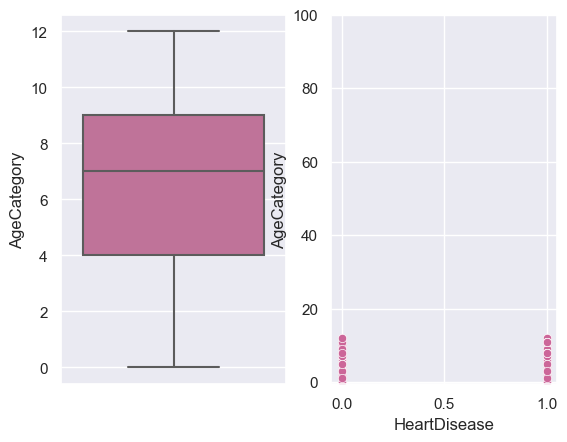

In [66]:
sns.set()
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(data=df_1,y='AgeCategory',color='#cc6699')
# ax1.set_yticks([2,4,6,8,10,20,40,60,80,100])
plt.subplot(1, 2, 2)
ax =sns.scatterplot(data=df_1,x='HeartDisease',y='AgeCategory',color='#cc6699')
ax.set_yticks([0,20,40,60,80,100])
plt.show()

In [67]:
correlated_with_target

['BMI',
 'Smoking',
 'Stroke',
 'PhysicalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Diabetic',
 'KidneyDisease',
 'SkinCancer',
 'Race_White',
 'GenHealth_Fair',
 'GenHealth_Poor']

In [68]:
df_1[df_1['PhysicalHealth'] > 10]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Race_Black,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,1,0,0,0,1,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,0,0,0,0,1,0,0,0,0,1
6,0,21.63,0,0,0,15.0,0.0,0,0,10,...,1,0,1,0,1,0,1,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,8,...,1,0,0,0,1,0,0,0,1,0
25,0,29.18,1,0,0,30.0,30.0,1,0,8,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319763,0,30.11,1,0,0,30.0,0.0,0,1,8,...,0,0,0,0,0,0,1,0,0,0
319765,1,38.45,0,0,1,30.0,15.0,1,0,7,...,1,0,0,0,0,0,0,0,1,0
319774,0,20.36,0,0,0,30.0,0.0,1,0,7,...,0,0,0,0,0,0,1,0,0,0
319779,0,23.38,1,0,0,30.0,0.0,1,0,10,...,0,0,0,0,0,0,1,0,0,0


In [69]:
df_1[df_1['BMI'] > 90]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,Race_Black,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
104267,0,93.97,1,0,0,20.0,25.0,1,0,6,...,0,0,0,0,1,0,0,0,1,0
105476,0,91.55,1,0,0,0.0,0.0,0,1,4,...,0,0,0,0,0,1,0,0,0,0
114087,0,91.55,0,0,0,0.0,10.0,1,0,7,...,0,0,0,0,0,1,0,0,0,0
126661,0,91.82,0,0,0,0.0,2.0,0,0,9,...,0,0,0,1,0,0,0,0,0,1
126896,0,94.85,0,0,0,0.0,0.0,0,1,3,...,0,0,0,0,1,1,0,0,0,0
156093,0,92.53,1,0,0,7.0,0.0,1,0,9,...,1,0,0,1,0,0,0,0,1,0
242834,0,94.66,0,0,0,4.0,0.0,0,0,6,...,0,0,0,0,1,0,0,0,0,1
249715,0,93.86,1,1,0,30.0,30.0,1,0,9,...,1,1,0,0,0,0,0,0,1,0


> **consider BMI > 90 is an outliers and remove these rows** 

In [70]:
df_1.drop(df_1[df_1['BMI'] > 90].index,inplace=True)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

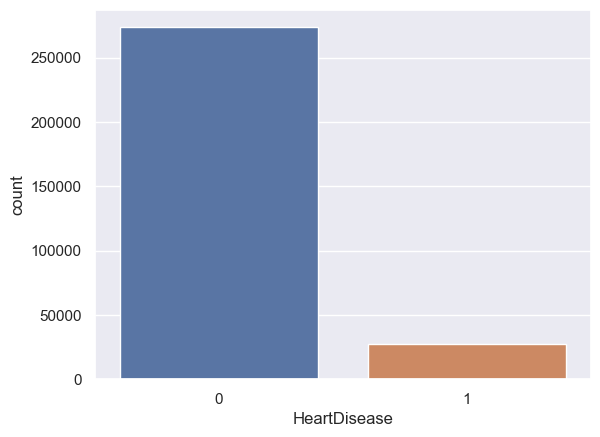

In [71]:
sns.countplot(x=df_1['HeartDisease'])

In [72]:
correlated_with_target

['BMI',
 'Smoking',
 'Stroke',
 'PhysicalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Diabetic',
 'KidneyDisease',
 'SkinCancer',
 'Race_White',
 'GenHealth_Fair',
 'GenHealth_Poor']

In [73]:
correlated_with_target.remove('PhysicalHealth')

In [74]:
correlated_with_target

['BMI',
 'Smoking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Diabetic',
 'KidneyDisease',
 'SkinCancer',
 'Race_White',
 'GenHealth_Fair',
 'GenHealth_Poor']

In [75]:
uncorrelated_with_target

['PhysicalActivity', 'GenHealth_Excellent', 'GenHealth_Very good']

In [76]:
len(correlated_with_target)+len(uncorrelated_with_target)

15

In [77]:
Input_1[correlated_with_target]

,BMI,Smoking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,KidneyDisease,SkinCancer,Race_White,GenHealth_Fair,GenHealth_Poor
0,16.60,1,0,0,0,7,1,0,1,1,0,0
1,20.34,0,1,0,0,12,0,0,0,1,0,0
2,26.58,1,0,0,1,9,1,0,0,1,1,0
3,24.21,0,0,0,0,11,0,0,1,1,0,0
4,23.71,0,0,1,0,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,1,1,8,1,0,0,0,1,0
319791,29.84,1,0,0,1,3,0,0,0,0,0,0
319792,24.24,0,0,0,0,5,0,0,0,0,0,0
319793,32.81,0,0,0,0,1,0,0,0,0,0,0


In [78]:
features = pd.concat([df_1[correlated_with_target],df_1[uncorrelated_with_target]],axis=1)

In [79]:
features

,BMI,Smoking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,KidneyDisease,SkinCancer,Race_White,GenHealth_Fair,GenHealth_Poor,PhysicalActivity,GenHealth_Excellent,GenHealth_Very good
0,16.60,1,0,0,0,7,1,0,1,1,0,0,1,0,1
1,20.34,0,1,0,0,12,0,0,0,1,0,0,1,0,1
2,26.58,1,0,0,1,9,1,0,0,1,1,0,1,0,0
3,24.21,0,0,0,0,11,0,0,1,1,0,0,0,0,0
4,23.71,0,0,1,0,4,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,1,1,8,1,0,0,0,1,0,0,0,0
319791,29.84,1,0,0,1,3,0,0,0,0,0,0,1,0,1
319792,24.24,0,0,0,0,5,0,0,0,0,0,0,1,0,0
319793,32.81,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [80]:
features.isna().sum()

BMI                    0
Smoking                0
Stroke                 0
DiffWalking            0
Sex                    0
AgeCategory            0
Diabetic               0
KidneyDisease          0
SkinCancer             0
Race_White             0
GenHealth_Fair         0
GenHealth_Poor         0
PhysicalActivity       0
GenHealth_Excellent    0
GenHealth_Very good    0
dtype: int64

In [81]:
target = df_1['HeartDisease']

In [82]:
target.value_counts()

0    273506
1     27257
Name: HeartDisease, dtype: int64

In [83]:
target

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 300763, dtype: int64

In [84]:
features['HeartDisease'] = target

In [85]:
features.isna().sum()

BMI                    0
Smoking                0
Stroke                 0
DiffWalking            0
Sex                    0
AgeCategory            0
Diabetic               0
KidneyDisease          0
SkinCancer             0
Race_White             0
GenHealth_Fair         0
GenHealth_Poor         0
PhysicalActivity       0
GenHealth_Excellent    0
GenHealth_Very good    0
HeartDisease           0
dtype: int64

In [86]:
df2 = features.copy()

In [87]:
df2

,BMI,Smoking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,KidneyDisease,SkinCancer,Race_White,GenHealth_Fair,GenHealth_Poor,PhysicalActivity,GenHealth_Excellent,GenHealth_Very good,HeartDisease
0,16.60,1,0,0,0,7,1,0,1,1,0,0,1,0,1,0
1,20.34,0,1,0,0,12,0,0,0,1,0,0,1,0,1,0
2,26.58,1,0,0,1,9,1,0,0,1,1,0,1,0,0,0
3,24.21,0,0,0,0,11,0,0,1,1,0,0,0,0,0,0
4,23.71,0,0,1,0,4,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,1,1,8,1,0,0,0,1,0,0,0,0,1
319791,29.84,1,0,0,1,3,0,0,0,0,0,0,1,0,1,0
319792,24.24,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0
319793,32.81,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[['BMI','AgeCategory']] = scaler.fit_transform(df2[['BMI','AgeCategory']])

In [89]:
df2.max()

BMI                    1.0
Smoking                1.0
Stroke                 1.0
DiffWalking            1.0
Sex                    1.0
AgeCategory            1.0
Diabetic               1.0
KidneyDisease          1.0
SkinCancer             1.0
Race_White             1.0
GenHealth_Fair         1.0
GenHealth_Poor         1.0
PhysicalActivity       1.0
GenHealth_Excellent    1.0
GenHealth_Very good    1.0
HeartDisease           1.0
dtype: float64

In [90]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [91]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=50)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

## Modeling

In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [92]:
# Function to plot the confusion matrix:
def cmatrix_fun(model_name, actual, predicted):
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()    

## Method 1: Undersampling

In [93]:
count_class_0,count_class_1 = target.value_counts()

In [94]:
count_class_0,count_class_1

(273506, 27257)

In [95]:
df_class_0 = df2[df2['HeartDisease'] == 0]
df_class_1 = df2[df2['HeartDisease'] == 1]

In [96]:
df_class_0_under = df_class_0.sample(count_class_1)

In [97]:
df_under = pd.concat([df_class_1,df_class_0_under])

In [98]:
df_under['HeartDisease'].value_counts()

1    27257
0    27257
Name: HeartDisease, dtype: int64

In [99]:
df_under

,BMI,Smoking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,KidneyDisease,SkinCancer,Race_White,GenHealth_Fair,GenHealth_Poor,PhysicalActivity,GenHealth_Excellent,GenHealth_Very good,HeartDisease
5,0.220031,1,0,1,0,0.916667,0,0,0,0,1,0,0,0,0,1
10,0.290938,1,0,1,1,0.666667,1,0,0,1,0,1,0,0,0,1
35,0.273701,1,1,1,1,0.916667,1,0,1,1,0,1,1,0,0,1
42,0.170279,0,0,1,0,1.000000,1,0,1,1,0,0,0,0,0,1
43,0.237791,1,0,1,0,0.916667,1,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194154,0.298381,0,0,0,1,0.083333,0,0,0,0,0,0,1,1,0,0
221628,0.276312,1,0,1,0,0.666667,1,0,0,0,1,0,1,0,0,0
51413,0.211152,1,0,0,0,0.000000,0,0,0,1,0,0,1,0,1,0
124043,0.365239,0,0,0,0,0.000000,0,0,0,0,0,0,1,0,0,0


In [174]:
X = df_under.drop('HeartDisease',axis='columns')
y = df_under['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)

In [176]:
X_train.shape

(43611, 15)

In [178]:
X_test.shape

(10903, 15)

In [179]:
y_train.shape

(43611,)

In [180]:
y_test.shape

(10903,)

In [101]:
# !pip install tensorflow-addons

In [102]:
# y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

## RF

In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)

# Predict
y_pred_test = rf_clf.predict(X_test)
# y_pred_train = rf_clf.predict(X_train)

[[3793 1659]
 [1700 3751]]


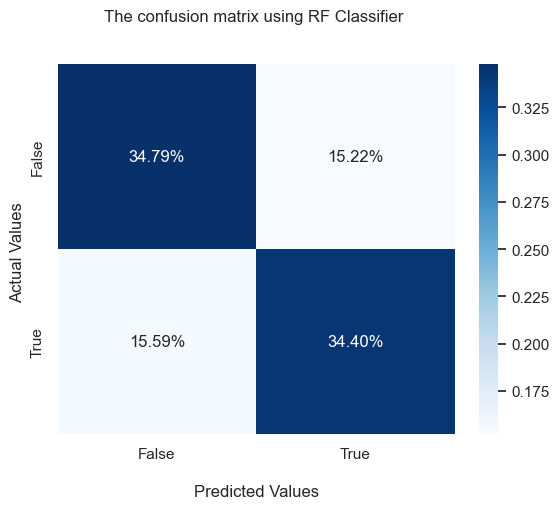

In [182]:
cmatrix_fun('RF', y_test, y_pred_test)

In [183]:
classification_report_fun('RF', y_test, y_pred_test)

The Classification Report for RF Classifier:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      5452
           1       0.69      0.69      0.69      5451

    accuracy                           0.69     10903
   macro avg       0.69      0.69      0.69     10903
weighted avg       0.69      0.69      0.69     10903



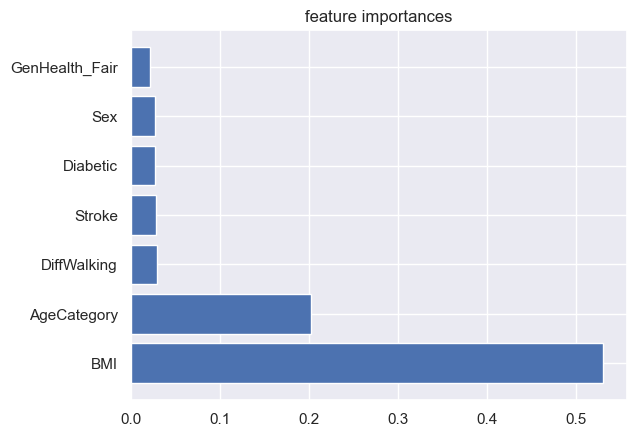

In [184]:
f_importances(rf_clf.feature_importances_,features,top=7)

In [185]:
# print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train , y_pred)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test , y_pred)*100))

Accuracy of Test after Random Oversampling: 73.29175456296431


In [186]:
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train , rf_clf.predict(X_train))*100))

Accuracy of Train after Random Oversampling: 97.13145765976475


## KNN

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors = 2)

In [113]:
KNNClassifierModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [114]:
y_pred = KNNClassifierModel.predict(X_test)

[[4480  972]
 [3000 2451]]


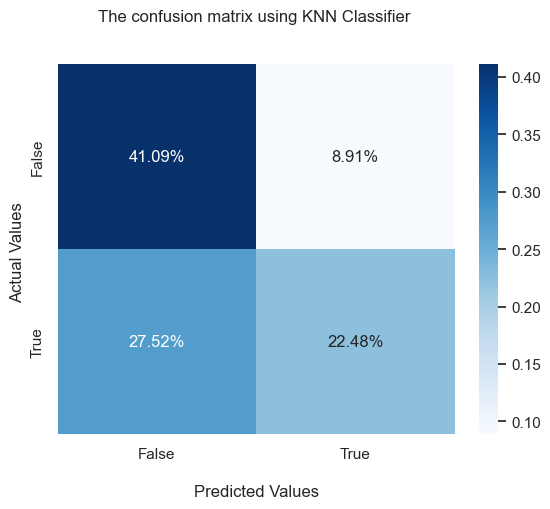

In [115]:
cmatrix_fun('KNN', y_test, y_pred)

In [116]:
classification_report_fun("KNN", y_test, y_pred)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.60      0.82      0.69      5452
           1       0.72      0.45      0.55      5451

    accuracy                           0.64     10903
   macro avg       0.66      0.64      0.62     10903
weighted avg       0.66      0.64      0.62     10903



## Logistic

In [117]:
from sklearn.linear_model import LogisticRegression

# Applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'sag', C = 1, random_state = 33)

In [118]:
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(C=1, random_state=33, solver='sag')

In [119]:
y_pred = LogisticRegressionModel.predict(X_test)

[[3917 1535]
 [1335 4116]]


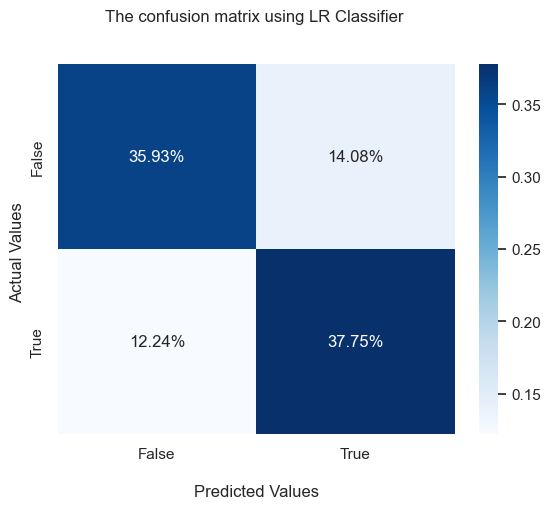

In [120]:
cmatrix_fun('LR', y_test, y_pred)

In [121]:
classification_report_fun("LR", y_test, y_pred)

The Classification Report for LR Classifier:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      5452
           1       0.73      0.76      0.74      5451

    accuracy                           0.74     10903
   macro avg       0.74      0.74      0.74     10903
weighted avg       0.74      0.74      0.74     10903



## XGBoost

In [122]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [123]:
y_pred = xgb.predict(X_test)

[[3710 1742]
 [1170 4281]]


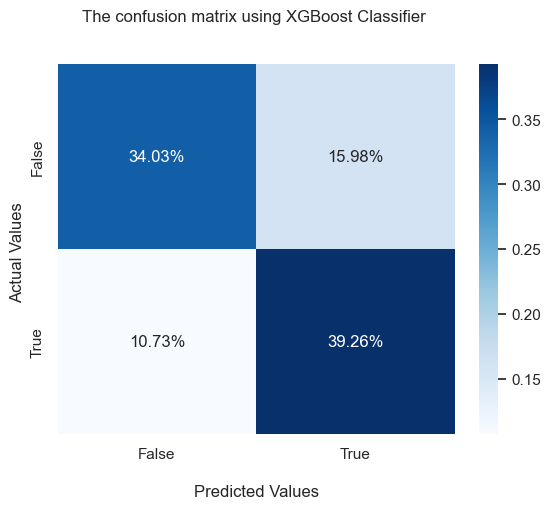

In [124]:
cmatrix_fun("XGBoost", y_test, y_pred)

In [125]:
classification_report_fun("XGBoost", y_test, y_pred)

The Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      5452
           1       0.71      0.79      0.75      5451

    accuracy                           0.73     10903
   macro avg       0.74      0.73      0.73     10903
weighted avg       0.74      0.73      0.73     10903



## Method2: Oversampling

In [187]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [188]:
df_over['HeartDisease'].value_counts()

0    273506
1    273506
Name: HeartDisease, dtype: int64

In [189]:
X = df_over.drop('HeartDisease',axis='columns')
y = df_over['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [190]:
# y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

## RF

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)

# Predict
y_pred_test = rf_clf.predict(X_test)
# y_pred_train = rf_clf.predict(X_train)

[[48031  6671]
 [  452 54249]]


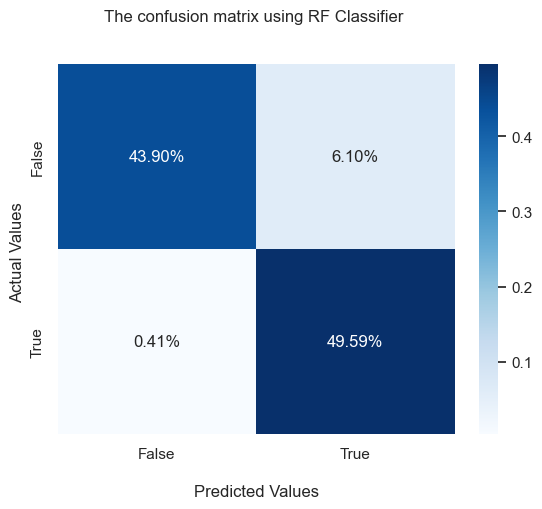

In [192]:
cmatrix_fun('RF', y_test, y_pred_test)

In [193]:
classification_report_fun('RF', y_test, y_pred_test)

The Classification Report for RF Classifier:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     54702
           1       0.89      0.99      0.94     54701

    accuracy                           0.93    109403
   macro avg       0.94      0.93      0.93    109403
weighted avg       0.94      0.93      0.93    109403



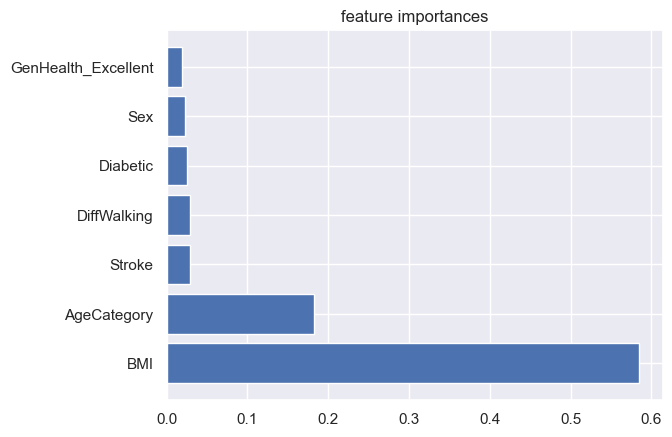

In [194]:
f_importances(rf_clf.feature_importances_,features,top=7)

In [196]:
rf_clf.score(X_test,y_test)

0.9348920961948027

In [197]:
rf_clf.score(X_train,y_train)

0.9735814391385917

## ROC

In [198]:
from sklearn.metrics import roc_curve

In [205]:
yhat = rf_clf.predict_proba(X_test)

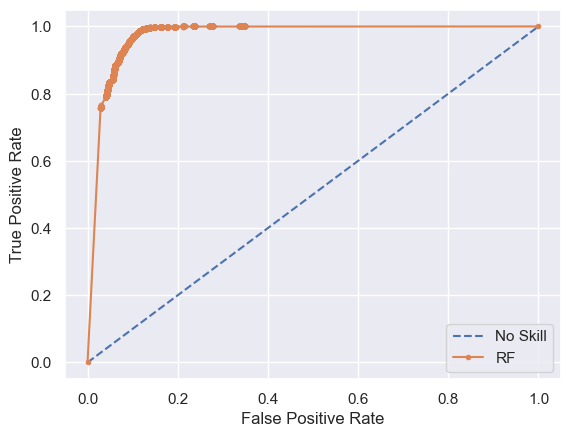

In [215]:
pos_probs = yhat[:,1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='RF')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## KNN

In [209]:
from sklearn.neighbors import KNeighborsClassifier

In [210]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors = 2)

In [211]:
KNNClassifierModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [212]:
y_pred = KNNClassifierModel.predict(X_test)

[[49138  5564]
 [ 4080 50621]]


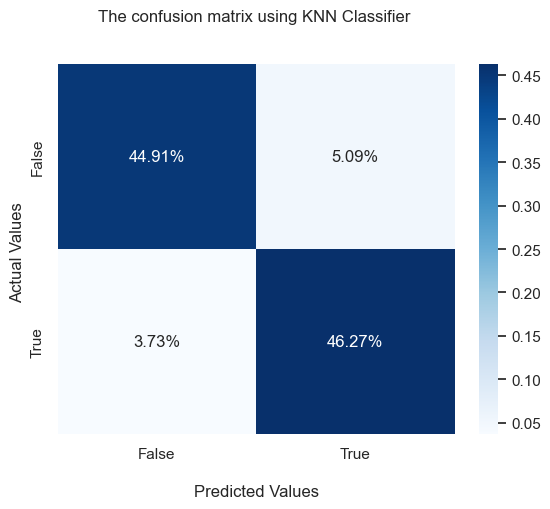

In [213]:
cmatrix_fun('KNN', y_test, y_pred)

In [214]:
classification_report_fun("KNN", y_test, y_pred)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     54702
           1       0.90      0.93      0.91     54701

    accuracy                           0.91    109403
   macro avg       0.91      0.91      0.91    109403
weighted avg       0.91      0.91      0.91    109403



In [216]:
KNNClassifierModel.score(X_test,y_test)

0.9118488524080692

In [217]:
KNNClassifierModel.score(X_train,y_train)

0.9532939221999548

## ROC

In [218]:
# from sklearn.metrics import roc_curve

In [219]:
yhat = KNNClassifierModel.predict_proba(X_test)

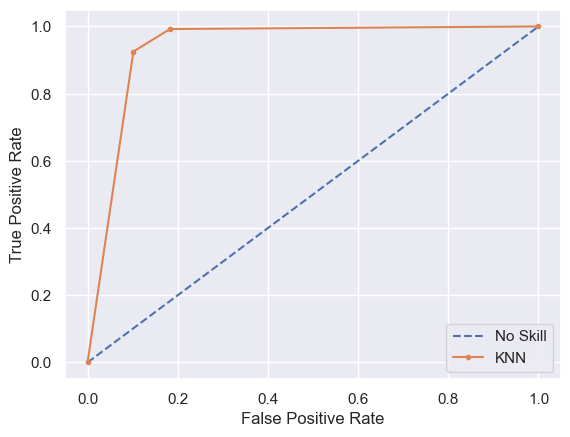

In [221]:
pos_probs = yhat[:,1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Logistic

In [222]:
from sklearn.linear_model import LogisticRegression

# Applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'sag', C = 1, random_state = 33)

In [223]:
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(C=1, random_state=33, solver='sag')

In [224]:
y_pred = LogisticRegressionModel.predict(X_test)

[[40409 14293]
 [12235 42466]]


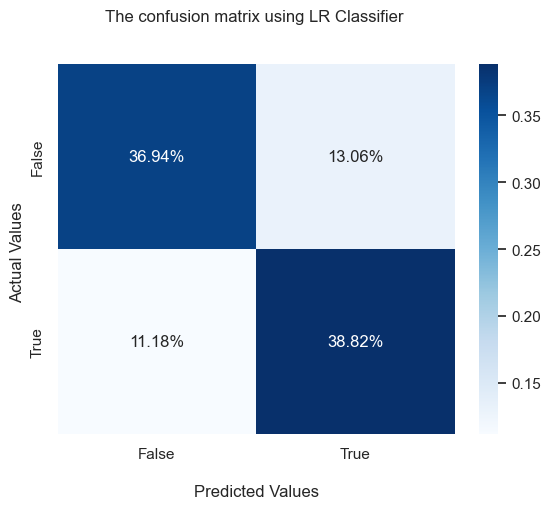

In [225]:
cmatrix_fun('LR', y_test, y_pred)

In [226]:
classification_report_fun("LR", y_test, y_pred)

The Classification Report for LR Classifier:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75     54702
           1       0.75      0.78      0.76     54701

    accuracy                           0.76    109403
   macro avg       0.76      0.76      0.76    109403
weighted avg       0.76      0.76      0.76    109403



## XGBoost

In [227]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [228]:
y_pred = xgb.predict(X_test)

[[39718 14984]
 [ 9714 44987]]


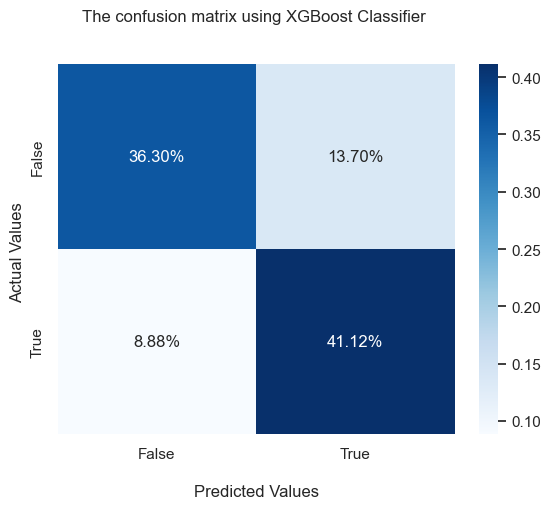

In [229]:
cmatrix_fun("XGBoost", y_test, y_pred)

In [230]:
classification_report_fun("XGBoost", y_test, y_pred)

The Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     54702
           1       0.75      0.82      0.78     54701

    accuracy                           0.77    109403
   macro avg       0.78      0.77      0.77    109403
weighted avg       0.78      0.77      0.77    109403



In [231]:
xgb.score(X_train,y_train)

0.777762797383052

In [232]:
xgb.score(X_test,y_test)

0.7742475069239417

## Decision Tree

In [233]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 8,max_depth = 8)

In [234]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features=8)

In [235]:
y_pred = dt.predict(X_test)

[[37511 17191]
 [10362 44339]]


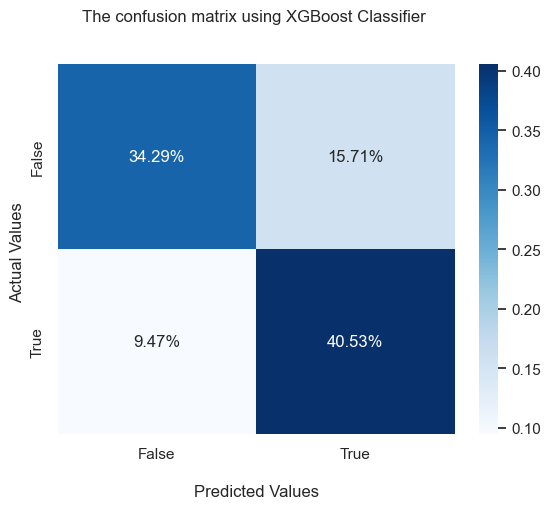

In [236]:
cmatrix_fun("XGBoost", y_test, y_pred)

In [237]:
classification_report_fun("XGBoost", y_test, y_pred)

The Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73     54702
           1       0.72      0.81      0.76     54701

    accuracy                           0.75    109403
   macro avg       0.75      0.75      0.75    109403
weighted avg       0.75      0.75      0.75    109403



In [238]:
dt.score(X_train,y_train)


0.7491664933765073

In [239]:
dt.score(X_test,y_test)


0.7481513304022741

## Method3: SMOTE

In [130]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [131]:
X = df2.drop('HeartDisease',axis='columns')
y = df2['HeartDisease']

In [132]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    273506
1    273506
Name: HeartDisease, dtype: int64

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [216]:
# y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

## RF

In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=25,random_state=365)

# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)

# Predict
y_pred_test = rf_clf.predict(X_test)
# y_pred_train = rf_clf.predict(X_train)

[[45545  9157]
 [ 9948 44753]]


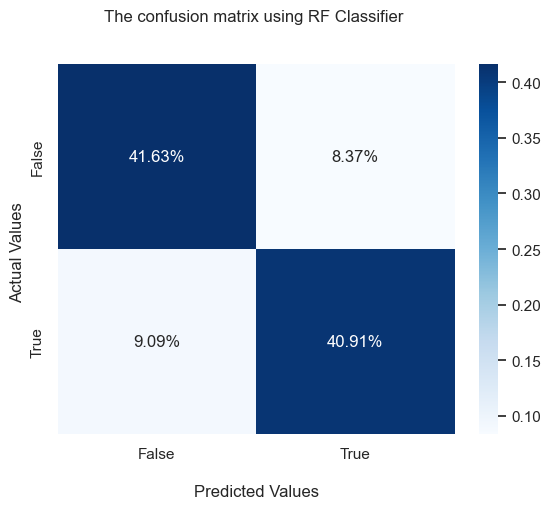

In [242]:
cmatrix_fun('RF', y_test, y_pred_test)

In [243]:
classification_report_fun('RF', y_test, y_pred_test)

The Classification Report for RF Classifier:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     54702
           1       0.83      0.82      0.82     54701

    accuracy                           0.83    109403
   macro avg       0.83      0.83      0.83    109403
weighted avg       0.83      0.83      0.83    109403



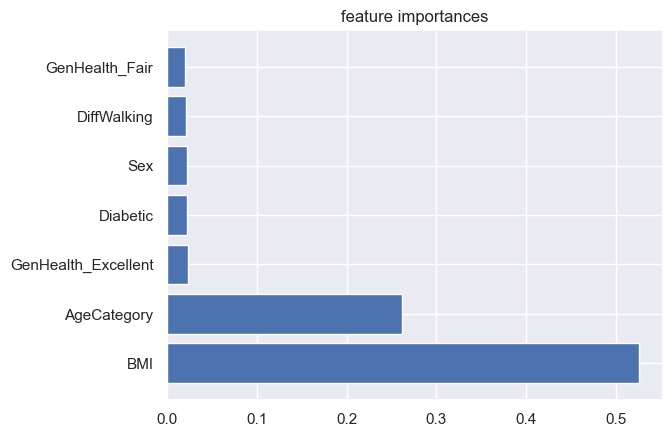

In [244]:
f_importances(rf_clf.feature_importances_,features,top=7)

In [245]:
rf_clf = RandomForestClassifier(criterion='gini',n_estimators=20,max_features='log2',random_state=365)

# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)

# Predict
y_pred_test = rf_clf.predict(X_test)
# y_pred_train = rf_clf.predict(X_train)

[[45762  8940]
 [10236 44465]]


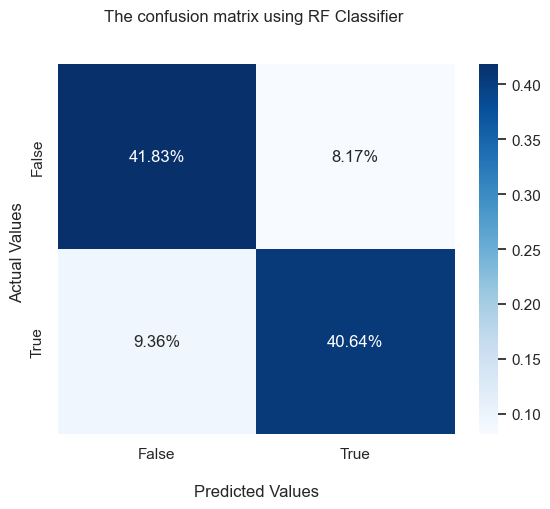

In [246]:
cmatrix_fun('RF', y_test, y_pred_test)

In [247]:
rf_clf.score(X_train, y_train)

0.9821484475867727

In [248]:
rf_clf.score(X_test, y_test)

0.8247214427392302

In [249]:
classification_report_fun('RF', y_test, y_pred_test)

The Classification Report for RF Classifier:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     54702
           1       0.83      0.81      0.82     54701

    accuracy                           0.82    109403
   macro avg       0.82      0.82      0.82    109403
weighted avg       0.82      0.82      0.82    109403



## KNN

In [250]:
from sklearn.neighbors import KNeighborsClassifier

In [251]:
KNNClassifierModel = KNeighborsClassifier(n_neighbors = 2)

In [252]:
KNNClassifierModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [253]:
y_pred = KNNClassifierModel.predict(X_test)

[[48645  6057]
 [17720 36981]]


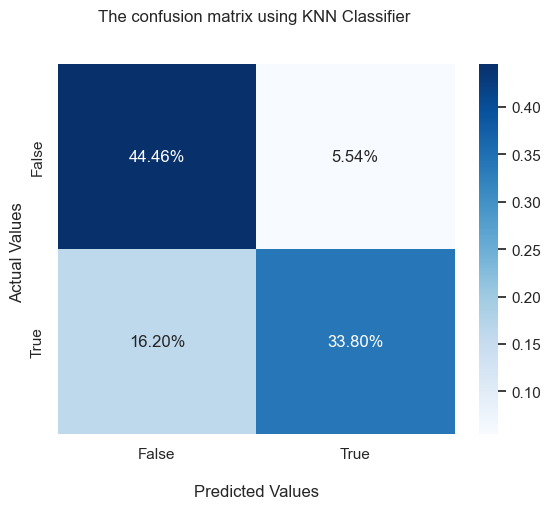

In [254]:
cmatrix_fun('KNN', y_test, y_pred)

In [255]:
classification_report_fun("KNN", y_test, y_pred)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80     54702
           1       0.86      0.68      0.76     54701

    accuracy                           0.78    109403
   macro avg       0.80      0.78      0.78    109403
weighted avg       0.80      0.78      0.78    109403



In [256]:
KNNClassifierModel.score(X_train,y_train)

0.8990217294434072

In [257]:
KNNClassifierModel.score(X_test,y_test)

0.7826659232379368

## Logistic

In [258]:
from sklearn.linear_model import LogisticRegression

# Applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'sag', C = 1, random_state = 33)

In [259]:
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(C=1, random_state=33, solver='sag')

In [260]:
y_pred = LogisticRegressionModel.predict(X_test)

[[40300 14402]
 [12001 42700]]


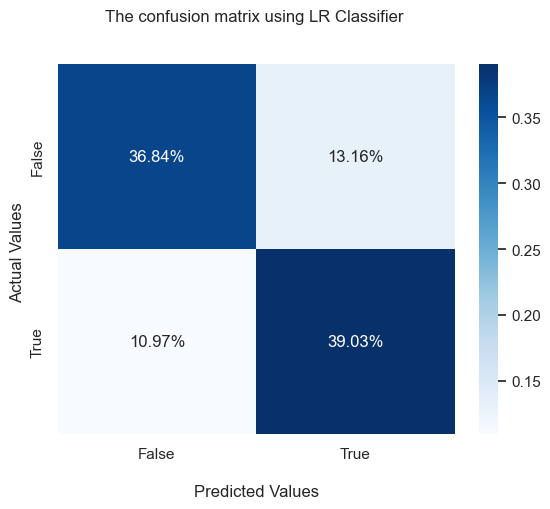

In [261]:
cmatrix_fun('LR', y_test, y_pred)

In [262]:
classification_report_fun("LR", y_test, y_pred)

The Classification Report for LR Classifier:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75     54702
           1       0.75      0.78      0.76     54701

    accuracy                           0.76    109403
   macro avg       0.76      0.76      0.76    109403
weighted avg       0.76      0.76      0.76    109403



## XGBoost

In [263]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [264]:
y_pred = xgb.predict(X_test)

[[45510  9192]
 [ 7851 46850]]


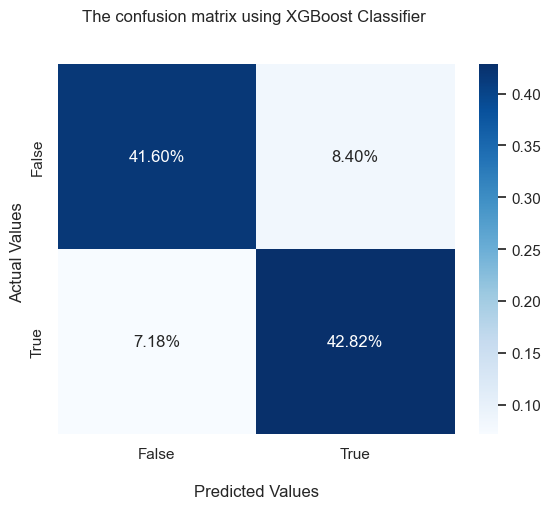

In [265]:
cmatrix_fun("XGBoost", y_test, y_pred)

In [266]:
classification_report_fun("XGBoost", y_test, y_pred)

The Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     54702
           1       0.84      0.86      0.85     54701

    accuracy                           0.84    109403
   macro avg       0.84      0.84      0.84    109403
weighted avg       0.84      0.84      0.84    109403

